# `Customer Churn Analysis`
## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [3]:
## Importing the librabries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
## importing the dataset:
df=pd.read_csv('Telecom_customer_churn.csv')
pd.set_option('max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
## checking the size of the dataset:
df.shape

(7043, 21)

As we see that we have 7043 rows and 21 columns including target varibale.

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## About the columns:

### Features:
- `CustomerID`:- Unique identification for customers.
- `Gender`, `SeniorCitizen` are Self Explanatory.
- `Partner`: Is customer is married or not.
- `Dependents`:- Yes or no
- `Tenure`:- The relationship period of customer with company.
- `PhoneSevice`:- Is customer has telephone service or not.
- `MultipleLines`:- multiple lines are connected or not
- `InternetService`:- Customer's Internet service Provider name.
- `OnlineSecurity`:- Is customer have any online security sevice holder or not.
- `OnlineBackup`:- Online Backup service is activated or not.
- `DeviceProtection`:- Is Customer have any device protection or insurrance activated or not.
- `TechSupport`:- Technical support system available or not.
- `StreamingTV`:- live streaming service activated or not.
- `StreamingMovies`:- Live movies streaming service activated or not.
- `Contract`:- It is kind of service like prepaid , postpaid, monthly, yearly etc.
- `PaperLessBilling`:- Customer does paper less billing(online billing) or not.
- `PaymentMethod` , `MonthlyCharges`,`TotalCharges` are self Explanatory.
### Target:-
- `Churn`:- we can be said 'attrition' in simple term.(Yes or No)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Seems there is no nulls present in our dataset.
- Most of the columns are object data type.
- We Notice that `Total_Charges` feature data type should float data type but here we can see that it is showing object datatype. We have to see this columns separately.
- Our target variable is also object data type we will convert it into numeric for better understanding.
- Customer ID is a nomial data it is not for our use We will drop it ahead.

In [8]:
### Dropping the CustomerID as it is useless for us
df.drop('customerID',axis=1,inplace=True)

In [9]:
### checking the value count:
for i in df.columns:
    if df[i].dtypes=='object':
        print(i)
        print(df[i].value_counts())
        print("\n**************************************************************************\n")

gender
Male      3555
Female    3488
Name: gender, dtype: int64

**************************************************************************

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

**************************************************************************

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

**************************************************************************

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

**************************************************************************

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

**************************************************************************

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

**************************************************************************

OnlineSecurity
No                     3498


In [10]:
#### Checking nulls
df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')

In [11]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see that 'TotalCharges' feature has 11 nulls present now. We will replace it with mean value.

In [12]:
#### handling Nans
df.TotalCharges.fillna(df.TotalCharges.mean(),inplace=True)

In [13]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

We handle the mising value...

### Summary of Stats:

In [14]:
## Converting the Target into numeric

df.Churn=df.Churn.replace({'No':0,
                          'Yes':1})
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### Observations:-
- Our Label variable Churn is Binary type ie it is binary classification.
- We can see in tenure column that the maximum period of relationship with company by any customer is 72, similarly in other hand minimum period of relationship showing 0, which could be possible.
- maximum Monthly charges of any customer is  118.75
- Total Charges are not ideal distributed. It is showing unaccpetable range from 75% to maximum. Their could be possible that it is mistakenly recorded or might be some cumtomers bill are actually in out of accptable range. we will see that ahead. 

## Checking Duplicates:

In [15]:
df.duplicated().any()

True

There is duplicates present in our dataset... let's drop them as well.

In [16]:
### Dropping duplicates:
print("Pervious Shape of Dataset : ",df.shape)
df.drop_duplicates(inplace=True)
print("New Shape of Dataset : ",df.shape)

Pervious Shape of Dataset :  (7043, 20)
New Shape of Dataset :  (7021, 20)


# EDA:

Let's Check first our target:
- imbalanced or not?

0    0.735508
1    0.264492
Name: Churn, dtype: float64

*****************************************
0    5164
1    1857
Name: Churn, dtype: int64

******************************************


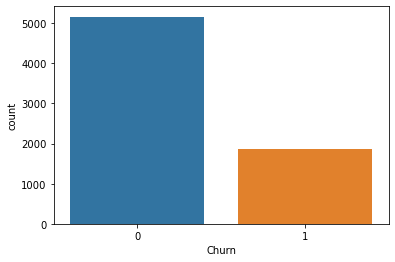

In [17]:
print(df.Churn.value_counts(normalize=True))
print("\n*****************************************")
print(df.Churn.value_counts())
print("\n******************************************")
sns.countplot(df.Churn)
plt.show()      

- We can see that our dataset is imbalanced, and data is skewed as we would expect a larger majority of the customers to not churn. This is important to keep in mind that our modelling as skewness  could lead to a lot of false negatives or typically  says our model could be biased. We will take care of that in model building.

### Gender:


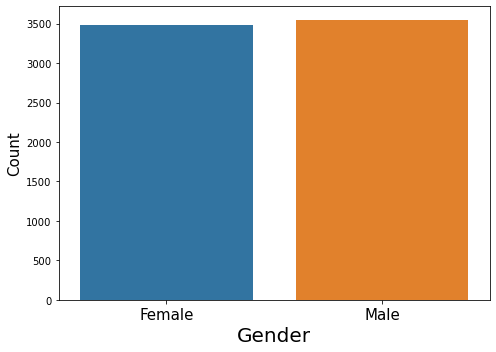

In [18]:
plt.figure(figsize=(7,5))
sns.countplot('gender',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Gender',fontsize=20)
plt.tight_layout()

There is equal count of female and male customers. Gender is equally exist.

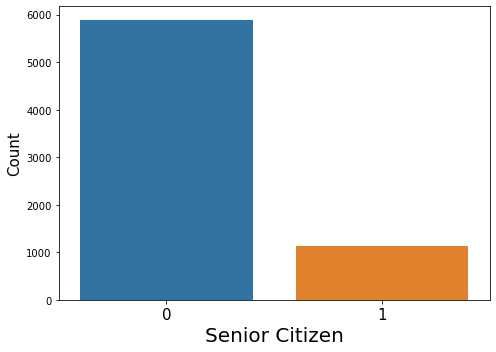

In [19]:
plt.figure(figsize=(7,5))
sns.countplot('SeniorCitizen',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Senior Citizen',fontsize=20)
plt.tight_layout()

The company have maximum young customers.

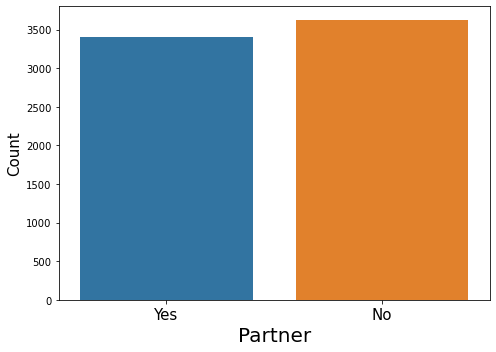

In [20]:
plt.figure(figsize=(7,5))
sns.countplot('Partner',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Partner',fontsize=20)
plt.tight_layout()

As we have seen that customers are almost equally churned by partner.

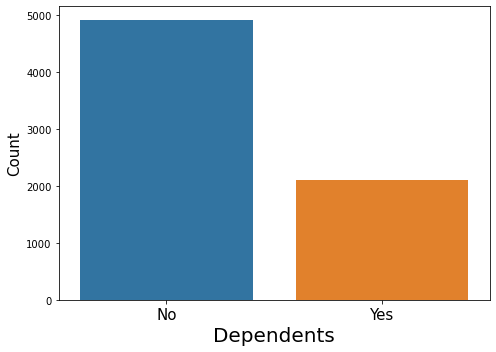

In [21]:
plt.figure(figsize=(7,5))
sns.countplot('Dependents',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Dependents',fontsize=20)
plt.tight_layout()

- There are more number of customer exist having no dependents.

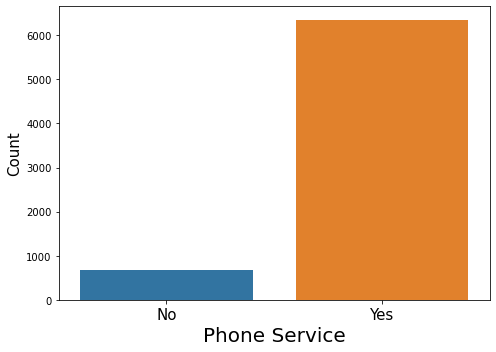

In [22]:
plt.figure(figsize=(7,5))
sns.countplot('PhoneService',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Phone Service',fontsize=20)
plt.tight_layout()

- Most of Customers taking advantage of Phone Services.

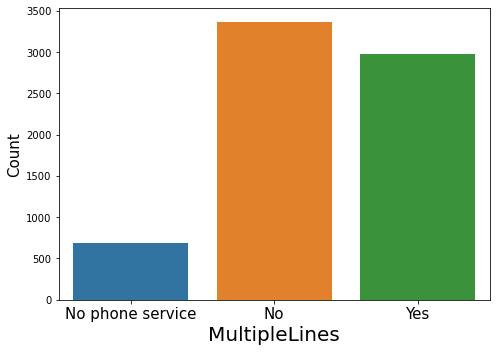

In [23]:
plt.figure(figsize=(7,5))
sns.countplot('MultipleLines',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('MultipleLines',fontsize=20)
plt.tight_layout()

- Most of customers having any multilines and less customers having with any phone service.

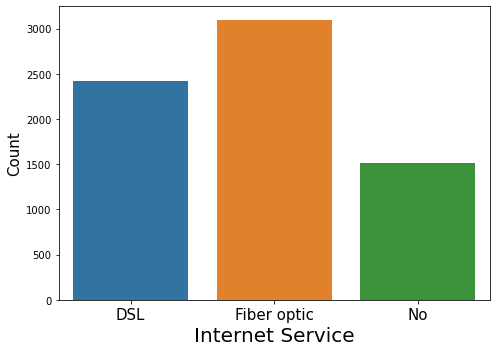

In [24]:
plt.figure(figsize=(7,5))
sns.countplot('InternetService',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Internet Service',fontsize=20)
plt.tight_layout()

- Most of the Customers prefered Fiber Optic Internet Service, may be it could be work throughout life.

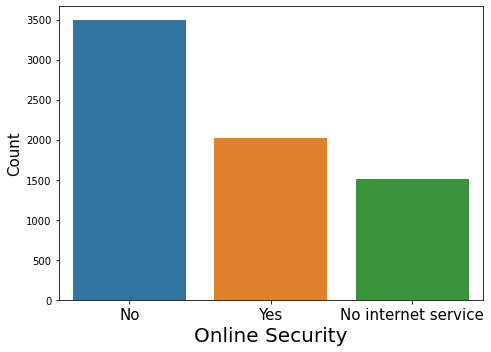

In [25]:
plt.figure(figsize=(7,5))
sns.countplot('OnlineSecurity',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Online Security',fontsize=20)
plt.tight_layout()

- Most of the customers having No online security.

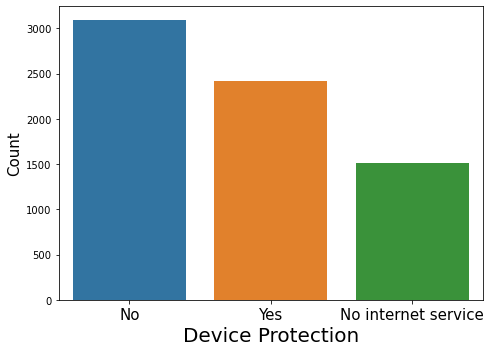

In [26]:
plt.figure(figsize=(7,5))
sns.countplot('DeviceProtection',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Device Protection',fontsize=20)
plt.tight_layout()

- Most of  the customers does not prefered any Device protections.

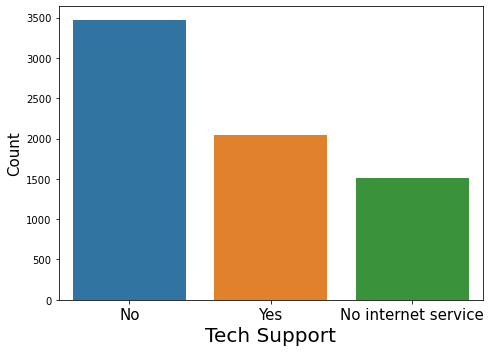

In [27]:
plt.figure(figsize=(7,5))
sns.countplot('TechSupport',data=df)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Tech Support',fontsize=20)
plt.tight_layout()

- Many customers having any tech supports.

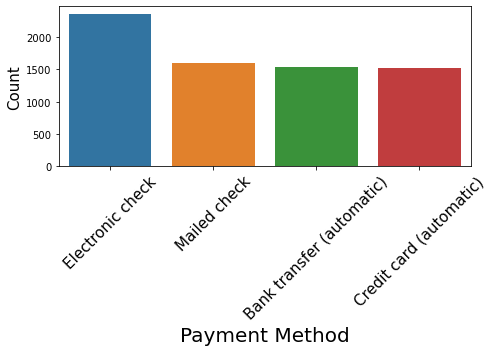

In [28]:
plt.figure(figsize=(7,5))
sns.countplot('PaymentMethod',data=df)
plt.xticks(rotation=45,fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Payment Method',fontsize=20)
plt.tight_layout()

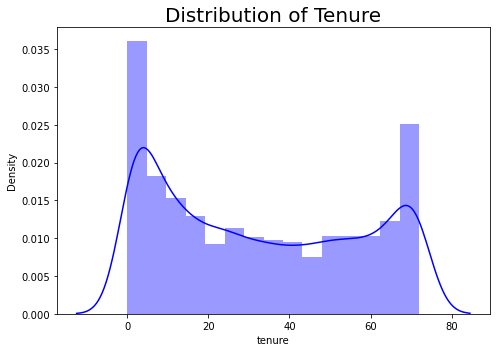

In [29]:
plt.figure(figsize=(7,5))
sns.distplot(df['tenure'],color='b')
plt.title("Distribution of Tenure",fontsize=20)
plt.tight_layout()

- Tenure is  quite well distributed.

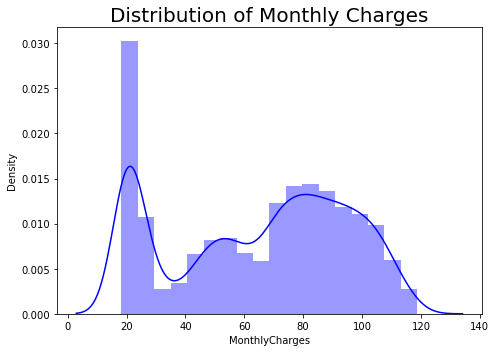

In [30]:
plt.figure(figsize=(7,5))
sns.distplot(df['MonthlyCharges'],color='b')
plt.title("Distribution of Monthly Charges",fontsize=20)
plt.tight_layout()

- Monthly charges is quite well distributed, we can see that most of the customers monthly charges between in range of 20-25.

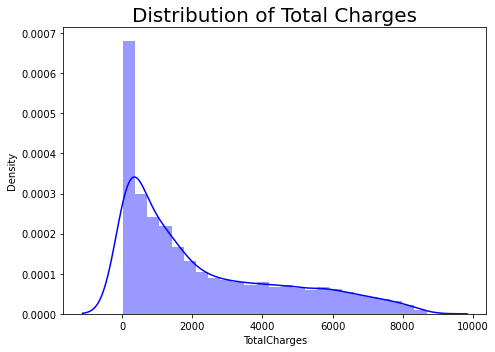

In [31]:
plt.figure(figsize=(7,5))
sns.distplot(df['TotalCharges'],color='b')
plt.title("Distribution of Total Charges",fontsize=20)
plt.tight_layout()

- As we assume that Total Charges is highly right skewed. Maximum Total Charges of the customers fall in range of 0 to 1500.

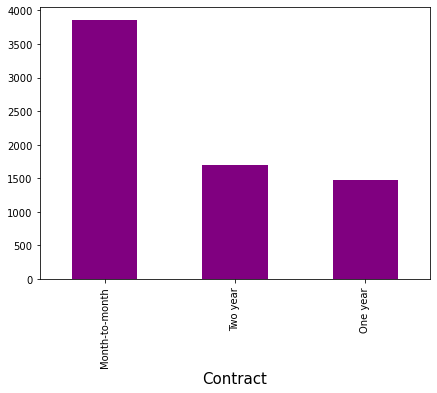

In [32]:
plt.figure(figsize=(7,5))
df.Contract.value_counts().plot(kind='bar',color='purple')
plt.xlabel('Contract',fontsize=15)
plt.show()

- customers are having month-to-month having high percentage of count.

### Feature Vs Target:

We have seen that our dataset has highest number of categorical or object data type features:
so we will use factor flot it plot them. Factor plot is always doing amazing role for categorical feature:

In [33]:
## Defining a function for plotting the categorical Features:
def factor_plot(feature):
    plt.figure(figsize=(7,5))
    sns.factorplot(x='Churn',col=feature,kind='count',data=df,size=4)
    plt.tight_layout()
    cross_tab=pd.crosstab(columns=df.Churn,index=df[feature],normalize='index')
    return cross_tab

Churn,0,1
Partner,,
No,0.671733,0.328267
Yes,0.803351,0.196649


<Figure size 504x360 with 0 Axes>

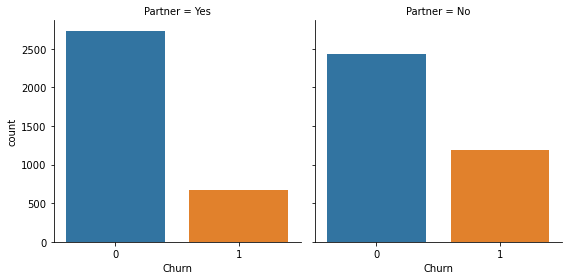

In [34]:
factor_plot('Partner')

- As we can see that married customers are more churned as compare to unmarried custormers.


Churn,0,1
gender,,
Female,0.731609,0.268391
Male,0.739339,0.260661


<Figure size 504x360 with 0 Axes>

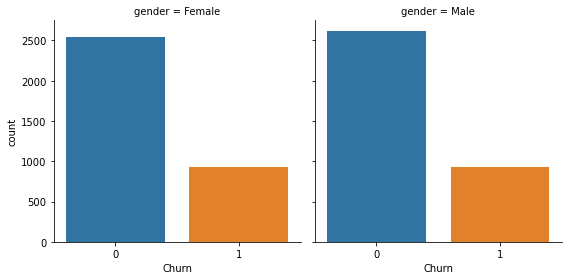

In [35]:
factor_plot('gender')

- Male and Female both are equally distributed.

Churn,0,1
Contract,,
Month-to-month,0.573579,0.426421
One year,0.887305,0.112695
Two year,0.971681,0.028319


<Figure size 504x360 with 0 Axes>

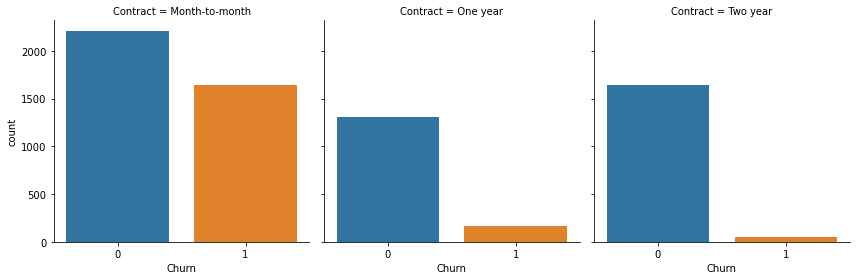

In [36]:
factor_plot('Contract')

- Most of customers having month-to-month, are switching it's service provider.
- One-Year and Two Year contract having customers having less change to switch it's service provider.
- in simple term customers who have a month to month contract have a very high churn rate.

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.548538,0.451462
Mailed check,0.810777,0.189223


<Figure size 504x360 with 0 Axes>

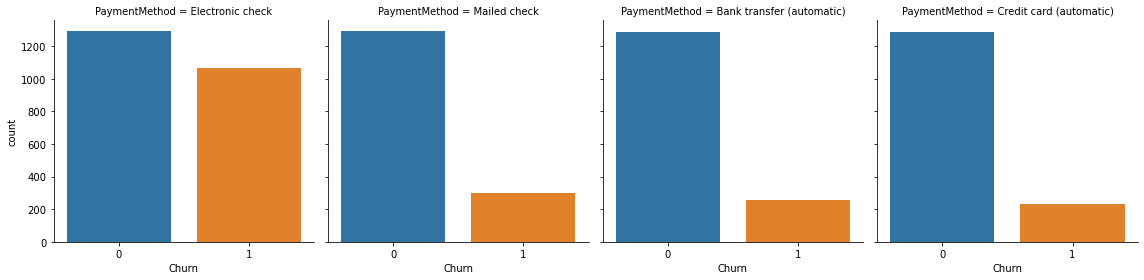

In [37]:
factor_plot('PaymentMethod')

- Most of customers who moved out were having electronic check as the payment method.
- Customers who choose 'Mailed check',Bank Transfer','CreditCard' as a payment method were less likely moved out.

Churn,0,1
InternetService,,
DSL,0.811079,0.188921
Fiber optic,0.582201,0.417799
No,0.927910,0.072090


<Figure size 504x360 with 0 Axes>

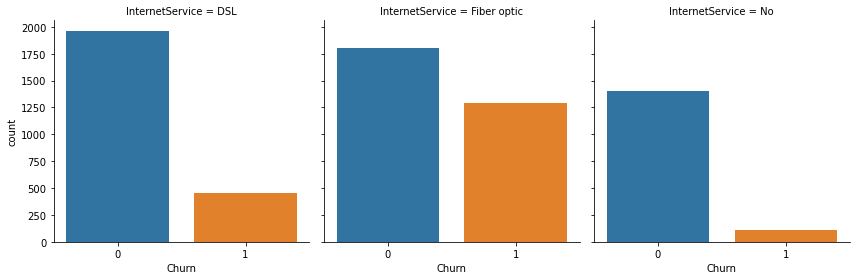

In [38]:
factor_plot('InternetService')

- As we see above that most of the customers are choosed fiber optic as  serive for Internet service, but it is also we can see that there is high churn rate as well, this might suggest a customer's disappointment with this type of Internet Service
- We see that Most of the customers choose DSL as a Internet service provider and we also see that customers having DSL services are majority in count and having less churn rate as compare to Fiber optic.

Churn,0,1
Dependents,,
No,0.688251,0.311749
Yes,0.845498,0.154502


<Figure size 504x360 with 0 Axes>

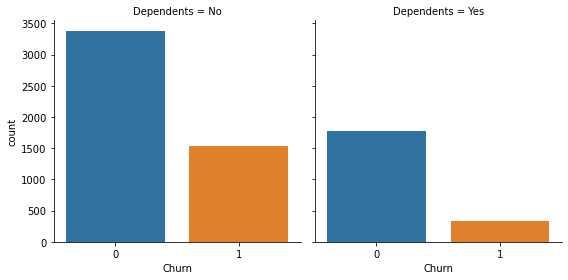

In [39]:
factor_plot('Dependents')

- Customer having without dependents are less chance to switch it's service provider.

Churn,0,1
SeniorCitizen,,
0,0.764966,0.235034
1,0.583699,0.416301


<Figure size 504x360 with 0 Axes>

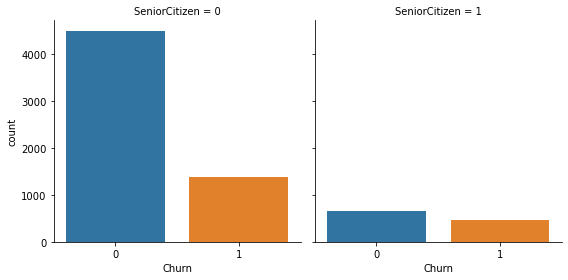

In [40]:
factor_plot('SeniorCitizen')

- We can see in above graph table that young customers have less churn rate to moved out.
- Senior Citizen customers are most likely to moved out.
- Senior Citizen almost double the churn rate than younger population.

Churn,0,1
OnlineSecurity,,
No,0.583668,0.416332
No internet service,0.927910,0.072090
Yes,0.853888,0.146112


<Figure size 504x360 with 0 Axes>

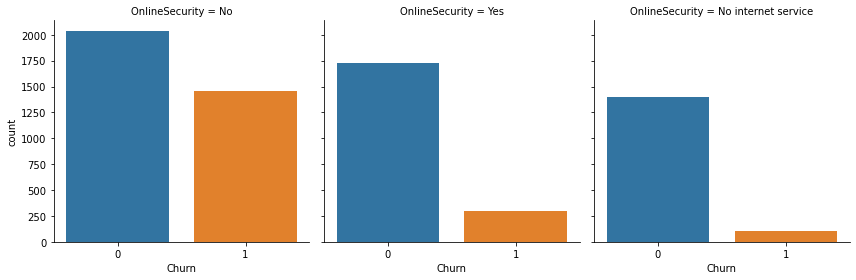

In [41]:
factor_plot('OnlineSecurity')

- Customers without having online security , their high chance to churn as it's count is also high.
- But in other hand If customers choose onlineSecurity then their churn rate are going least.

Churn,0,1
PaperlessBilling,,
No,0.837063,0.162937
Yes,0.665705,0.334295


<Figure size 504x360 with 0 Axes>

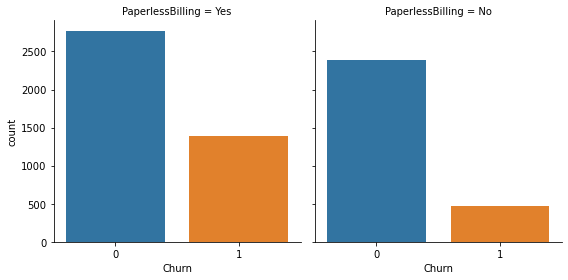

In [42]:
factor_plot('PaperlessBilling')

- Customers are more likely to less chance to switch service provider if they donot do paperlessBilling.

Churn,0,1
TechSupport,,
No,0.584993,0.415007
No internet service,0.927910,0.072090
Yes,0.848337,0.151663


<Figure size 504x360 with 0 Axes>

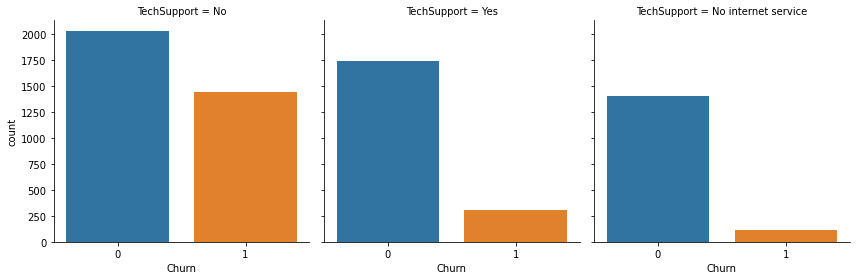

In [43]:
factor_plot('TechSupport')

- if customer does not use TechSupport service by the service provider then their high chance to moved out.
- if customer use tech support service then their switching chance is less. 


Churn,0,1
PhoneService,,
No,0.750733,0.249267
Yes,0.733870,0.266130


<Figure size 504x360 with 0 Axes>

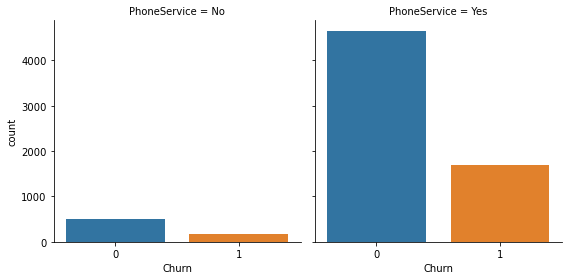

In [44]:
factor_plot('PhoneService')

- very less customer want to choose phone service.
- If customer have phone service activated then there are 26% chance to churn.

## Continous Features:

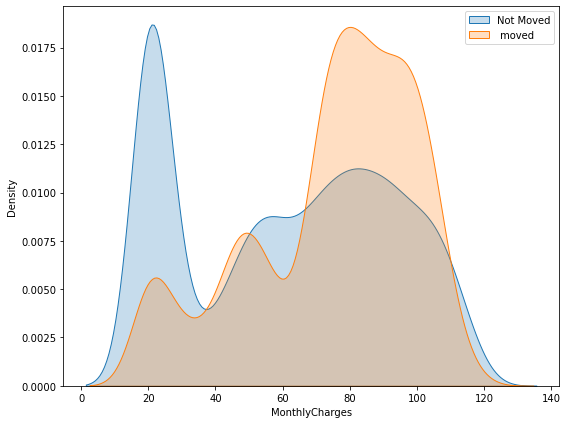

In [45]:
plt.figure(figsize=(8,6))
ax=sns.kdeplot(df.MonthlyCharges[df['Churn']==0],shade=True)
sns.kdeplot(df.MonthlyCharges[df['Churn']==1],ax=ax,shade=True)
ax.legend(['Not Moved',' moved'],loc='upper right')
plt.tight_layout()

- If customer's Monthly Charges is in the range 0-40 then their are less chance to moved out.
- sililarly in other hand if monthly charges inthe range of 70 to 120 then their high chance to moved out.

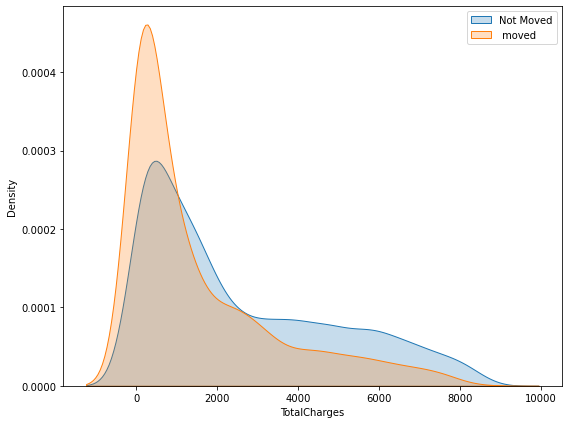

In [46]:
plt.figure(figsize=(8,6))
ax=sns.kdeplot(df.TotalCharges[df['Churn']==0],shade=True)
sns.kdeplot(df.TotalCharges[df['Churn']==1],ax=ax,shade=True)
ax.legend(['Not Moved',' moved'],loc='upper right')
plt.tight_layout()

- As high total charges as high chance of churn.
- It seems that there is higher churn when the total charges are lower.

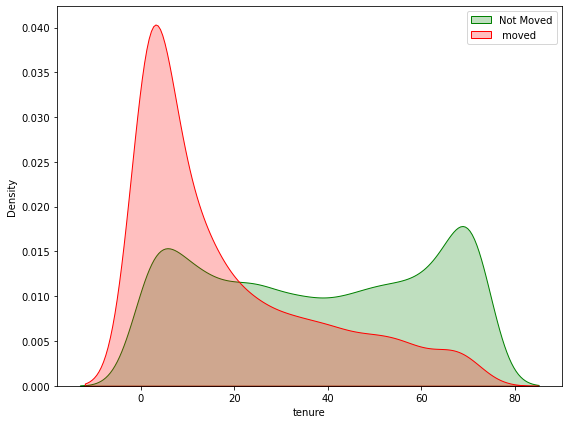

In [47]:
plt.figure(figsize=(8,6))
ax=sns.kdeplot(df.tenure[df['Churn']==0],shade=True,color='g')
sns.kdeplot(df.tenure[df['Churn']==1],ax=ax,shade=True,color='r')
ax.legend(['Not Moved',' moved'],loc='upper right')
plt.tight_layout()

- New customers are most likely to churn.
- similarly old customers are don't want to switch service provider.
- This shows that customers taking longer deal are more loyal to the company and tend to stay with it for a longer period of time.
- in simple term we can say that customers who dont want to churn they tend to stay for a longer tenure with telecom company

#### Monthly Charges Vs Total Charges:


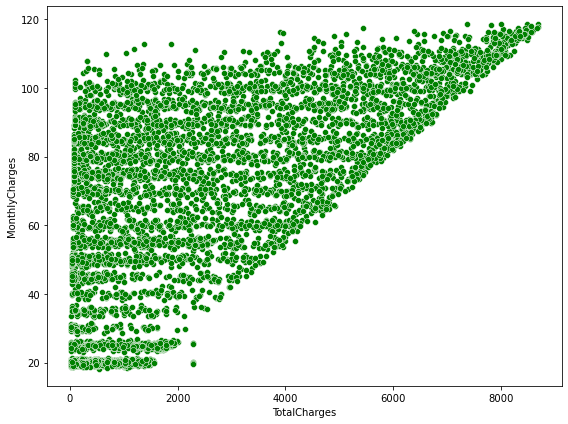

In [48]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(df.TotalCharges,df.MonthlyCharges,color='g')
plt.tight_layout()

- We can see that as monthly charges increasing the Total Charges also increasing.
Seems there are tight relation with each other.

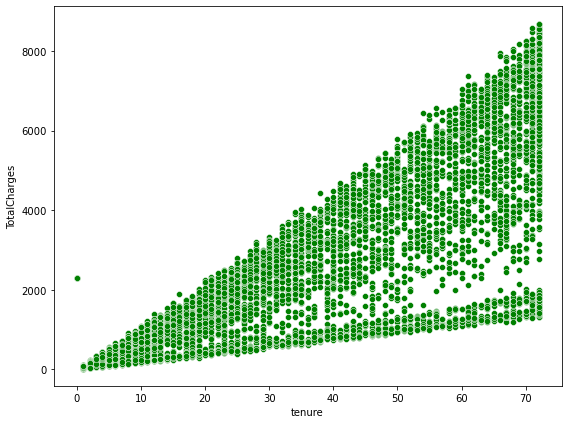

In [49]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(df.tenure,df.TotalCharges,color='g')
plt.tight_layout()

- We can see there is tight relation between total Charges and tenure and it is obvious that as long as customer stay with company their total charges will also increses in same ratio.

## Checking Outliers:

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Tenure:

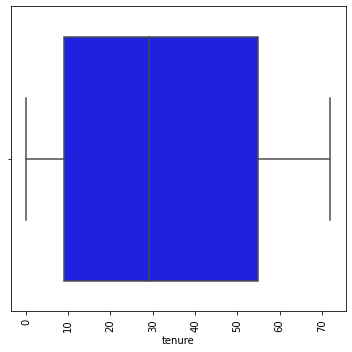

In [51]:
plt.figure(figsize=(5,5))
sns.boxplot(df.tenure,color='b')
plt.xticks(rotation=90)
plt.tight_layout()

### MonthlyCharges:

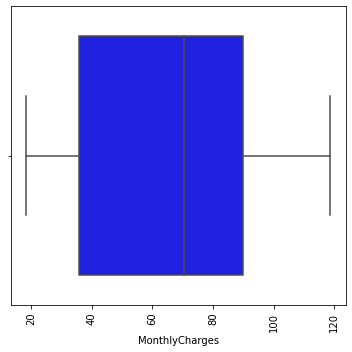

In [52]:
plt.figure(figsize=(5,5))
sns.boxplot(df.MonthlyCharges,color='b')
plt.xticks(rotation=90)
plt.tight_layout()

## TotalCharges:

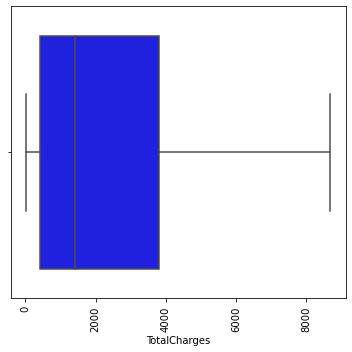

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot(df.TotalCharges,color='b')
plt.xticks(rotation=90)
plt.tight_layout()

- We can see that there are no outlier present in our dataset. 
- we will not  need to check outliers for categorical features.

## Checking Skewness:

In [54]:
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959088
Churn             1.068139
dtype: float64

We will check skewness only  for continous data type features. As we can see that Total Charges feature is little positive skewed. Let's handle it. 

In [55]:
df.TotalCharges=np.sqrt(df.TotalCharges)
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.306277
Churn             1.068139
dtype: float64

## Plotting Heatmap:

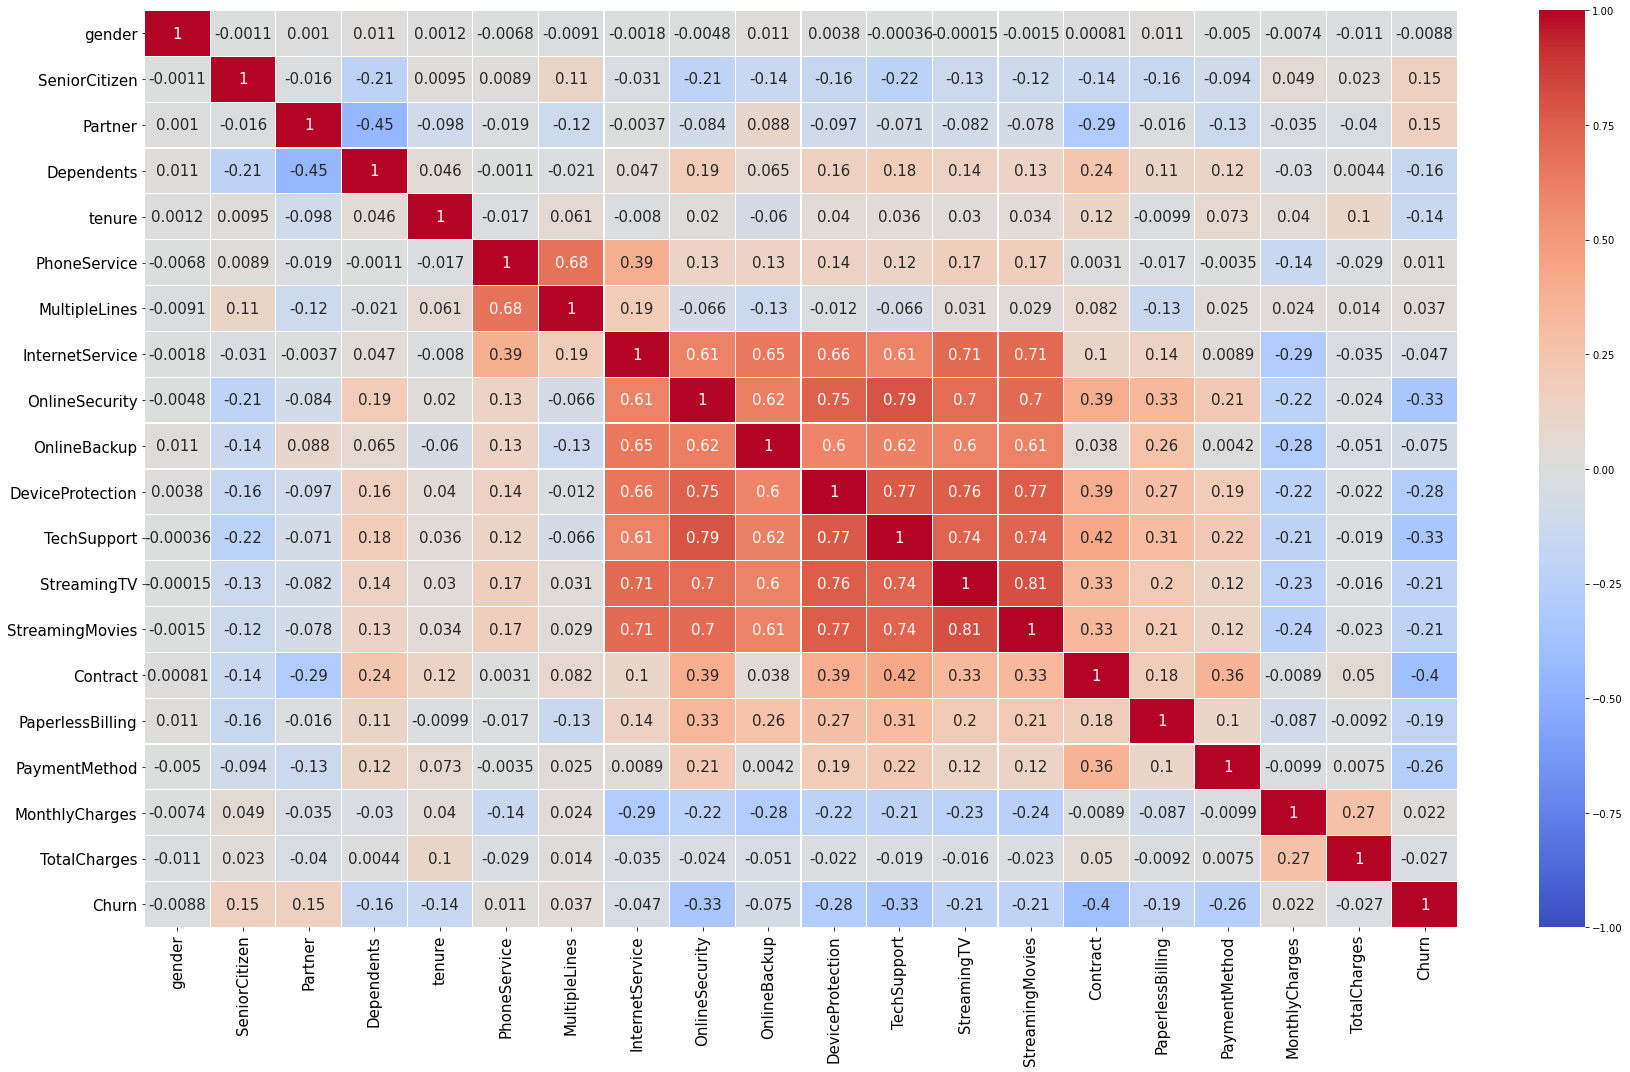

In [56]:
plt.figure(figsize=(25, 15))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,annot_kws={'size':15}, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

### Observations:-
- As we can see in the heatmap some features are negative and some features are postive correlate with our target variable 'Churn'.
- 'Internet Service' feature is tightly correlate with 'StreamingTV' and 'StreamingMovies' with 71% correlation.
- 'OnlineSecurity' and 'TechSupport' features are tightly corelated with 79%.
- 'StreamingMovies' and 'TechSupport' are highly correlated with  DeviceProtection with 77% corelation.
- 'StreamingTV' and 'StreamingMovie' Are highest correlated with each other with 81% corelation.

##### conclusion is that there are multicolinearity exist in our dataset: We will take care of that ahead:

In [57]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,5.463515,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,43.468379,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,10.399519,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,42.903963,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,12.314625,1


### Data Preprocessing:

In [58]:
df=pd.get_dummies(df,drop_first=True)

### Splitting dataset:

In [59]:
x=df.drop('Churn',axis=1)
y=df.Churn

In [60]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,5.463515,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,43.468379,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,10.399519,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,42.903963,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,12.314625,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,44.615020,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,85.807342,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,18.613167,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,17.509997,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### Correlation with Target:

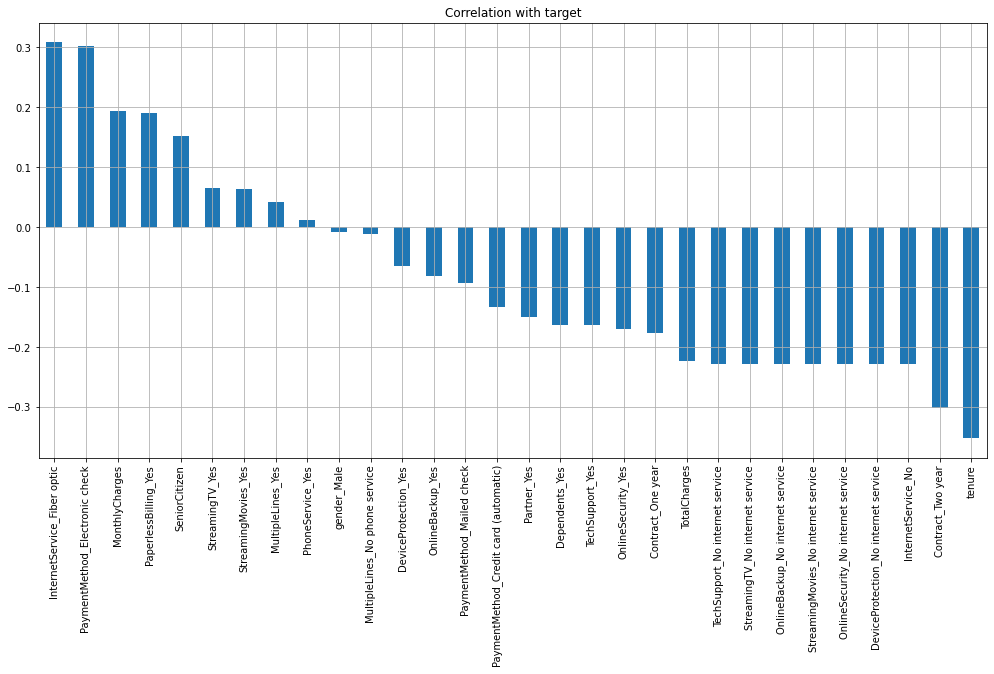

In [61]:
plt.figure(figsize=(15,10))
df.drop('Churn',axis=1).corrwith(df.Churn).sort_values(ascending=False).plot(kind='bar',grid=True,figsize=(17,8),title='Correlation with target')

plt.show()

- InternetService Fiber optic , paymentMethod_electric_check,Monthlycharges and paperless billing is positively  correlated with target variable.
- except above almost all the other features are negatively correlated with target variable.


In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [63]:
## scaling
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440508,-1.282728,-1.164135,-1.456608,-1.008726,1.031400,-0.655475,-3.048725,3.048725,-0.856493,-0.886600,-0.523889,-0.523889,-0.635326,-0.523889,1.374951,-0.523889,-0.725697,-0.523889,-0.640850,-0.523889,-0.792144,-0.523889,-0.798109,-0.515268,-0.564137,0.829057,-0.526097,1.405796,-0.542396
1,-0.440508,0.062387,-0.262811,0.095836,0.991349,-0.969556,-0.655475,0.328006,-0.328006,-0.856493,-0.886600,-0.523889,-0.523889,1.573996,-0.523889,-0.727299,-0.523889,1.377985,-0.523889,-0.640850,-0.523889,-0.792144,-0.523889,-0.798109,1.940738,-0.564137,-1.206190,-0.526097,-0.711341,1.843671
2,-0.440508,-1.241967,-0.365914,-1.254979,0.991349,-0.969556,-0.655475,0.328006,-0.328006,-0.856493,-0.886600,-0.523889,-0.523889,1.573996,-0.523889,1.374951,-0.523889,-0.725697,-0.523889,-0.640850,-0.523889,-0.792144,-0.523889,-0.798109,-0.515268,-0.564137,0.829057,-0.526097,-0.711341,1.843671
3,-0.440508,0.510759,-0.750058,0.072781,0.991349,-0.969556,-0.655475,-3.048725,3.048725,-0.856493,-0.886600,-0.523889,-0.523889,1.573996,-0.523889,-0.727299,-0.523889,1.377985,-0.523889,1.560427,-0.523889,-0.792144,-0.523889,-0.798109,1.940738,-0.564137,-1.206190,-0.526097,-0.711341,-0.542396
4,-0.440508,-1.241967,0.194503,-1.176750,-1.008726,-0.969556,-0.655475,0.328006,-0.328006,-0.856493,1.127904,-0.523889,-0.523889,-0.635326,-0.523889,-0.727299,-0.523889,-0.725697,-0.523889,-0.640850,-0.523889,-0.792144,-0.523889,-0.798109,-0.515268,-0.564137,0.829057,-0.526097,1.405796,-0.542396
5,-0.440508,-0.997401,1.157358,-0.509703,-1.008726,-0.969556,-0.655475,0.328006,-0.328006,1.167552,1.127904,-0.523889,-0.523889,-0.635326,-0.523889,-0.727299,-0.523889,1.377985,-0.523889,-0.640850,-0.523889,1.262397,-0.523889,1.252961,-0.515268,-0.564137,0.829057,-0.526097,1.405796,-0.542396
6,-0.440508,-0.426746,0.806473,0.123761,0.991349,-0.969556,1.525611,0.328006,-0.328006,1.167552,1.127904,-0.523889,-0.523889,-0.635326,-0.523889,1.374951,-0.523889,-0.725697,-0.523889,-0.640850,-0.523889,1.262397,-0.523889,-0.798109,-0.515268,-0.564137,0.829057,1.900792,-0.711341,-0.542396
7,-0.440508,-0.915879,-1.167461,-0.970030,-1.008726,-0.969556,-0.655475,-3.048725,3.048725,-0.856493,-0.886600,-0.523889,-0.523889,1.573996,-0.523889,-0.727299,-0.523889,-0.725697,-0.523889,-0.640850,-0.523889,-0.792144,-0.523889,-0.798109,-0.515268,-0.564137,-1.206190,-0.526097,-0.711341,1.843671
8,-0.440508,-0.182179,1.328642,0.574690,-1.008726,1.031400,-0.655475,0.328006,-0.328006,1.167552,1.127904,-0.523889,-0.523889,-0.635326,-0.523889,-0.727299,-0.523889,1.377985,-0.523889,1.560427,-0.523889,1.262397,-0.523889,1.252961,-0.515268,-0.564137,0.829057,-0.526097,1.405796,-0.542396
9,-0.440508,1.203697,-0.289418,0.732685,0.991349,-0.969556,1.525611,0.328006,-0.328006,-0.856493,-0.886600,-0.523889,-0.523889,1.573996,-0.523889,1.374951,-0.523889,-0.725697,-0.523889,-0.640850,-0.523889,-0.792144,-0.523889,-0.798109,1.940738,-0.564137,-1.206190,-0.526097,-0.711341,-0.542396


## Feature Selction 

In [64]:
from sklearn.feature_selection import SelectKBest,f_classif

In [65]:
best_features=SelectKBest(score_func=f_classif,k=22)  ### choosing top 22 features.
fit=best_features.fit(x,y)

In [66]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

### joining the both data frame
features_scores=pd.concat([df_columns,df_scores],axis=1)
features_scores.columns=['Feature_name','Score']
print(features_scores.nlargest(22,'Score'))

                             Feature_name       Score
1                                  tenure  989.515082
10            InternetService_Fiber optic  736.531702
25                      Contract_Two year  704.793516
28         PaymentMethod_Electronic check  702.065654
11                     InternetService_No  386.785733
12     OnlineSecurity_No internet service  386.785733
14       OnlineBackup_No internet service  386.785733
16   DeviceProtection_No internet service  386.785733
18        TechSupport_No internet service  386.785733
20        StreamingTV_No internet service  386.785733
22    StreamingMovies_No internet service  386.785733
3                            TotalCharges  370.765385
2                          MonthlyCharges  275.993382
26                   PaperlessBilling_Yes  265.441296
24                      Contract_One year  227.900408
13                     OnlineSecurity_Yes  210.204411
19                        TechSupport_Yes  193.847405
6                          D

In [67]:
new_x=x[['tenure','InternetService_Fiber optic','Contract_Two year','PaymentMethod_Electronic check',
         'InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service',
         'DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service',
         'StreamingMovies_No internet service','TotalCharges','MonthlyCharges','PaperlessBilling_Yes',
         'Contract_One year','OnlineSecurity_Yes','TechSupport_Yes','Dependents_Yes',
         'SeniorCitizen','Partner_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check']]

In [68]:
new_x

,tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,TotalCharges,MonthlyCharges,PaperlessBilling_Yes,Contract_One year,OnlineSecurity_Yes,TechSupport_Yes,Dependents_Yes,SeniorCitizen,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check
0,-1.282728,-0.886600,-0.564137,1.405796,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-1.456608,-1.164135,0.829057,-0.515268,-0.635326,-0.640850,-0.655475,-0.440508,1.031400,-0.526097,-0.542396
1,0.062387,-0.886600,-0.564137,-0.711341,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,0.095836,-0.262811,-1.206190,1.940738,1.573996,-0.640850,-0.655475,-0.440508,-0.969556,-0.526097,1.843671
2,-1.241967,-0.886600,-0.564137,-0.711341,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-1.254979,-0.365914,0.829057,-0.515268,1.573996,-0.640850,-0.655475,-0.440508,-0.969556,-0.526097,1.843671
3,0.510759,-0.886600,-0.564137,-0.711341,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,0.072781,-0.750058,-1.206190,1.940738,1.573996,1.560427,-0.655475,-0.440508,-0.969556,-0.526097,-0.542396
4,-1.241967,1.127904,-0.564137,1.405796,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-1.176750,0.194503,0.829057,-0.515268,-0.635326,-0.640850,-0.655475,-0.440508,-0.969556,-0.526097,-0.542396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.345224,-0.886600,-0.564137,-0.711341,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,0.142675,0.663458,0.829057,1.940738,1.573996,1.560427,1.525611,-0.440508,1.031400,-0.526097,1.843671
7039,1.611307,1.127904,-0.564137,-0.711341,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,1.825322,1.275428,0.829057,1.940738,-0.635326,-0.640850,1.525611,-0.440508,1.031400,1.900792,-0.542396
7040,-0.875118,-0.886600,-0.564137,1.405796,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.919463,-1.172450,0.829057,-0.515268,1.573996,-0.640850,1.525611,-0.440508,1.031400,-0.526097,-0.542396
7041,-1.160445,1.127904,-0.564137,-0.711341,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.523889,-0.964526,0.317562,0.829057,-0.515268,-0.635326,-0.640850,-0.655475,2.270104,1.031400,-0.526097,1.843671


## PCA For Multicollinearity:

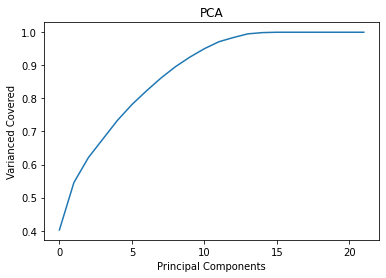

In [69]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(new_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()

13 components are enough to explain whole dataset. So will consider only 13 components.

In [70]:
pca=PCA(n_components=13)
new_comp=pca.fit_transform(x)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                     'PC11','PC12','PC13'])
x_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.337985,-3.288363,3.537058,2.191881,-1.072147,0.484479,0.697310,-1.163473,0.480939,0.422019,-1.434171,-0.894159,0.855640
1,-0.251595,-0.685685,1.234841,-2.750669,1.628243,0.823526,-1.035602,1.083074,0.839546,0.646239,0.756948,0.101973,-0.956368
2,-0.100867,-2.213454,0.863670,-2.511605,0.132968,-0.787110,-0.546414,0.958619,0.925843,-0.303538,-1.689069,0.199471,0.743927
3,-0.944375,-0.722774,4.976441,0.226209,1.989571,0.829324,-0.526958,0.951619,0.281043,1.592289,0.437205,0.202420,-1.453743
4,-0.561832,-3.277974,-1.164584,-0.106391,-0.496848,-0.439055,0.497971,-1.053124,-0.610787,0.630135,-0.558588,0.254020,0.033328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,-1.936106,1.392731,0.708623,-2.101388,-0.027068,2.411691,-1.361349,0.886477,-0.530751,-1.504821,0.027099,1.201032,-1.682042
7017,-3.043052,2.989848,-0.862587,0.240816,1.075524,2.058975,1.435553,-1.065184,-0.715224,-1.489279,-0.203035,-1.565461,0.396574
7018,-0.320600,-2.464042,4.058933,1.490192,-2.167557,1.156409,1.245770,-1.221258,0.277555,0.571762,-0.887737,0.414594,-1.253746
7019,-0.591648,-2.105174,-1.374656,-0.580357,-0.637249,-0.246114,0.209804,1.197607,2.617695,-2.319105,0.164679,0.012159,-0.904046


In [71]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7021, dtype: int64

## SMOTE for Imbalanced Dataset:

In [72]:
## importing smote

from imblearn.over_sampling import SMOTE
sm=SMOTE()


In [73]:
### importing train test 
from sklearn.model_selection import train_test_split as tts

In [74]:
### importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC


In [75]:
#### importing metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

## Define a function For Best Random State:

In [76]:
### Checking target variable value counts:
df.Churn.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [81]:
### defining SMOTE
sm=SMOTE(0.80)

In [82]:
def find_state(Model,Feature,Target):
    maximum_roc_score=0
    for i in range(1,101):
        x_train,x_test,y_train,y_test=tts(Feature,Target,test_size=0.25,random_state=i)
        x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
        Model.fit(x_train_new,y_train_new)
        train_pred=Model.predict(x_train)
        test_pred=Model.predict(x_test)
        roc_score=roc_auc_score(y_test,test_pred)
        print("For Random State {}, the ROC Score is: {}".format(i,roc_score))
        if roc_score>maximum_roc_score:
            
            maximum_roc_score=roc_score
            j=i
    print("\n")        
    print(" The Highest ROC SCORE is: {}".format(maximum_roc_score))
    print("\n The Best Random State is:")
    return j
        

In [83]:
def Scores(model,X,Y,Random_state,train=True):
    x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.25,random_state=Random_state)
    x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
    model.fit(x_train_new,y_train_new)
    if train:
        train_pred=model.predict(x_train_new)
        print('After Oversampling the  new shape of Xtrain is : ',x_train_new.shape)
        print("After oversampling the new shape of Ytrain is : ",y_train_new.shape)
        print("\n********************Traning Scores****************************\n")
        print("Accuracy Score is {} for Training Model.".format(accuracy_score(y_train_new,train_pred)))
        print("\n F1 Score for the model is : \n", f1_score(y_train_new,train_pred))
        print("\n*******************Confusion Matrix***************************\n")
        print(confusion_matrix(y_train_new,train_pred))
        print("\n\n Training Classification Report \n",classification_report(y_train_new,train_pred))
    
    if train==False:
        pred=model.predict(x_test)
        print("\n\n")
        print("***********************Testing Scores******************************\n")
        print("Accuracy score for testing is : ", accuracy_score(y_test,pred))
        print("\n F1 Score for testing is : ", f1_score(y_test,pred))
        print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
        print("\n The Classification report for Testing \n", classification_report(y_test,pred))

### Define a function For Cross Validation:

In [84]:
### Importing Cross Validation:
from sklearn.model_selection import cross_val_score

In [85]:
def Cross_validation(clf,feature,target,Random_state):
    x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.25,random_state=Random_state)
    x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
    clf.fit(x_train_new,y_train_new)
    pred_y=clf.predict(x_test)
    for i in range(2,11):
        score=cross_val_score(clf,feature,target,cv=i)
        mean=score.mean()
        print("\n At cv = ",i)
        print("The Cross Validation Score is : ",mean)
        print("The Accuracy Score is : ",accuracy_score(y_test,pred_y))

## Logistic Regression:

In [86]:
find_state(LogisticRegression(),x_comp,y)

For Random State 1, the ROC Score is: 0.7543659832953683
For Random State 2, the ROC Score is: 0.7524906647315827
For Random State 3, the ROC Score is: 0.7664024599484595
For Random State 4, the ROC Score is: 0.7639954615150765
For Random State 5, the ROC Score is: 0.7669531829123043
For Random State 6, the ROC Score is: 0.7547218821349393
For Random State 7, the ROC Score is: 0.7611144042679312
For Random State 8, the ROC Score is: 0.758610162815126
For Random State 9, the ROC Score is: 0.7600677670424046
For Random State 10, the ROC Score is: 0.7601478216657975
For Random State 11, the ROC Score is: 0.774427893830879
For Random State 12, the ROC Score is: 0.7599190283400811
For Random State 13, the ROC Score is: 0.7499218400278532
For Random State 14, the ROC Score is: 0.767361111111111
For Random State 15, the ROC Score is: 0.7671301230100706
For Random State 16, the ROC Score is: 0.7634261569684266
For Random State 17, the ROC Score is: 0.7351600089515498
For Random State 18, the R

76

In [87]:
print(Scores(LogisticRegression(),x_comp,y,76,train=True))
print(Scores(LogisticRegression(),x_comp,y,76,train=False))

After Oversampling the  new shape of Xtrain is :  (6973, 13)
After oversampling the new shape of Ytrain is :  (6973,)

********************Traning Scores****************************

Accuracy Score is 0.7582102394951957 for Training Model.

 F1 Score for the model is : 
 0.732720355104629

*******************Confusion Matrix***************************

[[2976  898]
 [ 788 2311]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      3874
           1       0.72      0.75      0.73      3099

    accuracy                           0.76      6973
   macro avg       0.76      0.76      0.76      6973
weighted avg       0.76      0.76      0.76      6973

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7818906605922551

 F1 Score for testing is :  0.6552655265526552
Confusion Matrix : 
 [[1009  281]
 [ 102  364]]

 The Classification report fo

### Cross Validation for Logistic Regression:

In [88]:
Cross_validation(LogisticRegression(),x_comp,y,76)


 At cv =  2
The Cross Validation Score is :  0.8001708509113807
The Accuracy Score is :  0.7830296127562643

 At cv =  3
The Cross Validation Score is :  0.7990321179129382
The Accuracy Score is :  0.7830296127562643

 At cv =  4
The Cross Validation Score is :  0.8000287171699473
The Accuracy Score is :  0.7830296127562643

 At cv =  5
The Cross Validation Score is :  0.8007407407407408
The Accuracy Score is :  0.7830296127562643

 At cv =  6
The Cross Validation Score is :  0.7996020884577674
The Accuracy Score is :  0.7830296127562643

 At cv =  7
The Cross Validation Score is :  0.7998860561173621
The Accuracy Score is :  0.7830296127562643

 At cv =  8
The Cross Validation Score is :  0.8006002550629475
The Accuracy Score is :  0.7830296127562643

 At cv =  9
The Cross Validation Score is :  0.7994601121361684
The Accuracy Score is :  0.7830296127562643

 At cv =  10
The Cross Validation Score is :  0.8003142818932293
The Accuracy Score is :  0.7830296127562643


We can see that our model are got underfitted.
- Best random state for Logistic Regression is 76.
- CV= 5 selected

## KNN Model:

In [89]:
find_state(KNeighborsClassifier(),x_comp,y)

For Random State 1, the ROC Score is: 0.7012148823082764
For Random State 2, the ROC Score is: 0.7076234245947158
For Random State 3, the ROC Score is: 0.7100258375330539
For Random State 4, the ROC Score is: 0.6994308620297262
For Random State 5, the ROC Score is: 0.707711784646394
For Random State 6, the ROC Score is: 0.6964279805433308
For Random State 7, the ROC Score is: 0.7116329136186872
For Random State 8, the ROC Score is: 0.6978958771008402
For Random State 9, the ROC Score is: 0.7120940687063876
For Random State 10, the ROC Score is: 0.7006431435890812
For Random State 11, the ROC Score is: 0.6947952544967471
For Random State 12, the ROC Score is: 0.7015249662618084
For Random State 13, the ROC Score is: 0.712913093216425
For Random State 14, the ROC Score is: 0.7012278582930758
For Random State 15, the ROC Score is: 0.7375920097152346
For Random State 16, the ROC Score is: 0.7182104002395449
For Random State 17, the ROC Score is: 0.6931541624706278
For Random State 18, the 

15

In [90]:
print(Scores(KNeighborsClassifier(),x_comp,y,15,train=True))
print(Scores(KNeighborsClassifier(),x_comp,y,15,train=False))

After Oversampling the  new shape of Xtrain is :  (6982, 13)
After oversampling the new shape of Ytrain is :  (6982,)

********************Traning Scores****************************

Accuracy Score is 0.853910054425666 for Training Model.

 F1 Score for the model is : 
 0.848349687778769

*******************Confusion Matrix***************************

[[3109  770]
 [ 250 2853]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      3879
           1       0.79      0.92      0.85      3103

    accuracy                           0.85      6982
   macro avg       0.86      0.86      0.85      6982
weighted avg       0.86      0.85      0.85      6982

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7232346241457859

 F1 Score for testing is :  0.5853242320819112
Confusion Matrix : 
 [[927 358]
 [128 343]]

 The Classification report for Tes

### Cross Validation For KNN Model:

In [91]:
 Cross_validation(KNeighborsClassifier(),x_comp,y,15)


 At cv =  2
The Cross Validation Score is :  0.7618564284329024
The Accuracy Score is :  0.7306378132118451

 At cv =  3
The Cross Validation Score is :  0.7638500360841242
The Accuracy Score is :  0.7306378132118451

 At cv =  4
The Cross Validation Score is :  0.7608582539960672
The Accuracy Score is :  0.7306378132118451

 At cv =  5
The Cross Validation Score is :  0.7605740588658738
The Accuracy Score is :  0.7306378132118451

 At cv =  6
The Cross Validation Score is :  0.7647067911371925
The Accuracy Score is :  0.7306378132118451

 At cv =  7
The Cross Validation Score is :  0.7622845748468879
The Accuracy Score is :  0.7306378132118451

 At cv =  8
The Cross Validation Score is :  0.7629992493564985
The Accuracy Score is :  0.7306378132118451

 At cv =  9
The Cross Validation Score is :  0.7622871911604306
The Accuracy Score is :  0.7306378132118451

 At cv =  10
The Cross Validation Score is :  0.7628588102272312
The Accuracy Score is :  0.7306378132118451


-  We can See that KNN model is little underfitted.
- Best Random State for KNN model is 15
- Best CV= 6 selected.

## Decision Tree :

In [92]:
find_state(DecisionTreeClassifier(),x_comp,y)

For Random State 1, the ROC Score is: 0.6511009870918755
For Random State 2, the ROC Score is: 0.6437421366216323
For Random State 3, the ROC Score is: 0.6617940937014285
For Random State 4, the ROC Score is: 0.6522427458166034
For Random State 5, the ROC Score is: 0.6573165754645478
For Random State 6, the ROC Score is: 0.6600195228483505
For Random State 7, the ROC Score is: 0.6498107701427204
For Random State 8, the ROC Score is: 0.6544281775210085
For Random State 9, the ROC Score is: 0.6571557971014493
For Random State 10, the ROC Score is: 0.6504145120920477
For Random State 11, the ROC Score is: 0.6295106220479354
For Random State 12, the ROC Score is: 0.6781477732793522
For Random State 13, the ROC Score is: 0.6742736451679373
For Random State 14, the ROC Score is: 0.6716753891572732
For Random State 15, the ROC Score is: 0.6785967434137153
For Random State 16, the ROC Score is: 0.6520178327843763
For Random State 17, the ROC Score is: 0.6585263511245384
For Random State 18, th

92

In [93]:
print(Scores(DecisionTreeClassifier(),x_comp,y,92,train=True))
print(Scores(DecisionTreeClassifier(),x_comp,y,92,train=False))

After Oversampling the  new shape of Xtrain is :  (6955, 13)
After oversampling the new shape of Ytrain is :  (6955,)

********************Traning Scores****************************

Accuracy Score is 0.999137311286844 for Training Model.

 F1 Score for the model is : 
 0.9990284974093265

*******************Confusion Matrix***************************

[[3864    0]
 [   6 3085]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       1.00      1.00      1.00      3091

    accuracy                           1.00      6955
   macro avg       1.00      1.00      1.00      6955
weighted avg       1.00      1.00      1.00      6955

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7061503416856492

 F1 Score for testing is :  0.49112426035502954
Confusion Matrix : 
 [[991 309]
 [207 249]]

 The Classification report for T

### Cross Validation For DecisionTree:

In [94]:
Cross_validation(DecisionTreeClassifier(),x_comp,y,92)


 At cv =  2
The Cross Validation Score is :  0.7144271848914401
The Accuracy Score is :  0.7164009111617312

 At cv =  3
The Cross Validation Score is :  0.7285296419213548
The Accuracy Score is :  0.7164009111617312

 At cv =  4
The Cross Validation Score is :  0.7181297821388938
The Accuracy Score is :  0.7164009111617312

 At cv =  5
The Cross Validation Score is :  0.7221192120124504
The Accuracy Score is :  0.7164009111617312

 At cv =  6
The Cross Validation Score is :  0.7202686724035999
The Accuracy Score is :  0.7164009111617312

 At cv =  7
The Cross Validation Score is :  0.7159948725252815
The Accuracy Score is :  0.7164009111617312

 At cv =  8
The Cross Validation Score is :  0.7291030849110267
The Accuracy Score is :  0.7164009111617312

 At cv =  9
The Cross Validation Score is :  0.7236868504474138
The Accuracy Score is :  0.7164009111617312

 At cv =  10
The Cross Validation Score is :  0.7211223369118106
The Accuracy Score is :  0.7164009111617312


Accuracy score and Cross validation score both are almost in the same range.
- best Random state for Decision tree 92 selected.
- best CV= 9

## SVC

In [95]:
find_state(SVC(kernel='linear'),x_comp,y)

For Random State 1, the ROC Score is: 0.7505694760820045
For Random State 2, the ROC Score is: 0.7534456085184009
For Random State 3, the ROC Score is: 0.7721839443954759
For Random State 4, the ROC Score is: 0.7671144239762244
For Random State 5, the ROC Score is: 0.7719422303290772
For Random State 6, the ROC Score is: 0.7516925316832667
For Random State 7, the ROC Score is: 0.7622364298416462
For Random State 8, the ROC Score is: 0.7671612394957983
For Random State 9, the ROC Score is: 0.7606615673644659
For Random State 10, the ROC Score is: 0.763669253518571
For Random State 11, the ROC Score is: 0.7726659741585115
For Random State 12, the ROC Score is: 0.7687314439946019
For Random State 13, the ROC Score is: 0.7540323440175647
For Random State 14, the ROC Score is: 0.7703770799785292
For Random State 15, the ROC Score is: 0.7670243789602386
For Random State 16, the ROC Score is: 0.7606846990717637
For Random State 17, the ROC Score is: 0.7368663981201746
For Random State 18, the

76

In [96]:
print(Scores(SVC(),x_comp,y,76,train=True))
print(Scores(SVC(),x_comp,y,76,train=False))

After Oversampling the  new shape of Xtrain is :  (6973, 13)
After oversampling the new shape of Ytrain is :  (6973,)

********************Traning Scores****************************

Accuracy Score is 0.7960705578660547 for Training Model.

 F1 Score for the model is : 
 0.7769061813617822

*******************Confusion Matrix***************************

[[3075  799]
 [ 623 2476]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      3874
           1       0.76      0.80      0.78      3099

    accuracy                           0.80      6973
   macro avg       0.79      0.80      0.79      6973
weighted avg       0.80      0.80      0.80      6973

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7801822323462415

 F1 Score for testing is :  0.6497277676950998
Confusion Matrix : 
 [[1012  278]
 [ 108  358]]

 The Classification report f

### Cross Validation For SVC:

In [97]:
Cross_validation(SVC(),x_comp,y,76)


 At cv =  2
The Cross Validation Score is :  0.798176832924768
The Accuracy Score is :  0.7813211845102506

 At cv =  3
The Cross Validation Score is :  0.8000281736078403
The Accuracy Score is :  0.7813211845102506

 At cv =  4
The Cross Validation Score is :  0.7998848068324151
The Accuracy Score is :  0.7813211845102506

 At cv =  5
The Cross Validation Score is :  0.8020219809187781
The Accuracy Score is :  0.7813211845102506

 At cv =  6
The Cross Validation Score is :  0.8011677018935771
The Accuracy Score is :  0.7813211845102506

 At cv =  7
The Cross Validation Score is :  0.8027346531833073
The Accuracy Score is :  0.7813211845102506

 At cv =  8
The Cross Validation Score is :  0.8018812515746631
The Accuracy Score is :  0.7813211845102506

 At cv =  9
The Cross Validation Score is :  0.8003128066508348
The Accuracy Score is :  0.7813211845102506

 At cv =  10
The Cross Validation Score is :  0.8014524646103593
The Accuracy Score is :  0.7813211845102506


- We can see that our model get little underfitted.
- Best Random State for SVC 76.
- Best cv= 9

## Ensemble Techniques:
### 1. Random Forest:

In [98]:
find_state(RandomForestClassifier(),x_comp,y)

For Random State 1, the ROC Score is: 0.6993166287015945
For Random State 2, the ROC Score is: 0.6894971301293584
For Random State 3, the ROC Score is: 0.7069929552351282
For Random State 4, the ROC Score is: 0.7016776778639219
For Random State 5, the ROC Score is: 0.6921274664134663
For Random State 6, the ROC Score is: 0.6972800370603225
For Random State 7, the ROC Score is: 0.699487678888983
For Random State 8, the ROC Score is: 0.6770745798319328
For Random State 9, the ROC Score is: 0.6935621309715514
For Random State 10, the ROC Score is: 0.7056146729596867
For Random State 11, the ROC Score is: 0.6996660056361549
For Random State 12, the ROC Score is: 0.7168792172739541
For Random State 13, the ROC Score is: 0.7068343790190212
For Random State 14, the ROC Score is: 0.7020497852925389
For Random State 15, the ROC Score is: 0.716589423942766
For Random State 16, the ROC Score is: 0.7033835712146921
For Random State 17, the ROC Score is: 0.693185632762672
For Random State 18, the R

61

In [99]:
print(Scores(RandomForestClassifier(),x_comp,y,61,train=True))
print(Scores(RandomForestClassifier(),x_comp,y,61,train=False))

After Oversampling the  new shape of Xtrain is :  (6973, 13)
After oversampling the new shape of Ytrain is :  (6973,)

********************Traning Scores****************************

Accuracy Score is 0.9985658970314069 for Training Model.

 F1 Score for the model is : 
 0.9983886561392201

*******************Confusion Matrix***************************

[[3865    9]
 [   1 3098]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3874
           1       1.00      1.00      1.00      3099

    accuracy                           1.00      6973
   macro avg       1.00      1.00      1.00      6973
weighted avg       1.00      1.00      1.00      6973

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7773348519362187

 F1 Score for testing is :  0.5736095965103598
Confusion Matrix : 
 [[1102  188]
 [ 203  263]]

 The Classification report f

### Cross Validation For Random Forest:

In [100]:
Cross_validation(RandomForestClassifier(),x_comp,y,61)


 At cv =  2
The Cross Validation Score is :  0.7712569206588005
The Accuracy Score is :  0.7813211845102506

 At cv =  3
The Cross Validation Score is :  0.7732522322868328
The Accuracy Score is :  0.7813211845102506

 At cv =  4
The Cross Validation Score is :  0.7691211734776655
The Accuracy Score is :  0.7813211845102506

 At cv =  5
The Cross Validation Score is :  0.7728225405805478
The Accuracy Score is :  0.7813211845102506

 At cv =  6
The Cross Validation Score is :  0.7699759866284205
The Accuracy Score is :  0.7813211845102506

 At cv =  7
The Cross Validation Score is :  0.7732516735507763
The Accuracy Score is :  0.7813211845102506

 At cv =  8
The Cross Validation Score is :  0.7716874933442077
The Accuracy Score is :  0.7813211845102506

 At cv =  9
The Cross Validation Score is :  0.7705452867424698
The Accuracy Score is :  0.7813211845102506

 At cv =  10
The Cross Validation Score is :  0.7712587081008134
The Accuracy Score is :  0.7813211845102506


- As we can see that Cross val_score and accuracy score both are almost same.
- best random State for random forest 61
- best cv=3

### 2. AdaBoost Classifier:

In [101]:
find_state(AdaBoostClassifier(),x_comp,y)

For Random State 1, the ROC Score is: 0.7441154138192864
For Random State 2, the ROC Score is: 0.7363347292142248
For Random State 3, the ROC Score is: 0.7516972702377187
For Random State 4, the ROC Score is: 0.7518917275646511
For Random State 5, the ROC Score is: 0.7604149488185369
For Random State 6, the ROC Score is: 0.7398282651136627
For Random State 7, the ROC Score is: 0.7480767602285089
For Random State 8, the ROC Score is: 0.7411436449579831
For Random State 9, the ROC Score is: 0.7480441492216854
For Random State 10, the ROC Score is: 0.744622623156112
For Random State 11, the ROC Score is: 0.7618152991287319
For Random State 12, the ROC Score is: 0.7556477732793522
For Random State 13, the ROC Score is: 0.7425108535779503
For Random State 14, the ROC Score is: 0.767398013955985
For Random State 15, the ROC Score is: 0.7597709980420829
For Random State 16, the ROC Score is: 0.7568420001996208
For Random State 17, the ROC Score is: 0.7277400134273246
For Random State 18, the 

14

In [102]:
print(Scores(AdaBoostClassifier(),x_comp,y,14,train=True))
print(Scores(AdaBoostClassifier(),x_comp,y,14,train=False))

After Oversampling the  new shape of Xtrain is :  (6962, 13)
After oversampling the new shape of Ytrain is :  (6962,)

********************Traning Scores****************************

Accuracy Score is 0.769750071818443 for Training Model.

 F1 Score for the model is : 
 0.7441340782122904

*******************Confusion Matrix***************************

[[3028  840]
 [ 763 2331]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      3868
           1       0.74      0.75      0.74      3094

    accuracy                           0.77      6962
   macro avg       0.77      0.77      0.77      6962
weighted avg       0.77      0.77      0.77      6962

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7750569476082004

 F1 Score for testing is :  0.6270066100094429
Confusion Matrix : 
 [[1029  267]
 [ 128  332]]

 The Classification report fo

In [103]:
Cross_validation(AdaBoostClassifier(),x_comp,y,14)


 At cv =  2
The Cross Validation Score is :  0.7866395479895907
The Accuracy Score is :  0.7824601366742597

 At cv =  3
The Cross Validation Score is :  0.7921956672277047
The Accuracy Score is :  0.7824601366742597

 At cv =  4
The Cross Validation Score is :  0.7897738482305681
The Accuracy Score is :  0.7824601366742597

 At cv =  5
The Cross Validation Score is :  0.790769940485243
The Accuracy Score is :  0.7824601366742597

 At cv =  6
The Cross Validation Score is :  0.7929080265971811
The Accuracy Score is :  0.7824601366742597

 At cv =  7
The Cross Validation Score is :  0.7907705455063382
The Accuracy Score is :  0.7824601366742597

 At cv =  8
The Cross Validation Score is :  0.792337494772768
The Accuracy Score is :  0.7824601366742597

 At cv =  9
The Cross Validation Score is :  0.7923390641700502
The Accuracy Score is :  0.7824601366742597

 At cv =  10
The Cross Validation Score is :  0.7923388976020556
The Accuracy Score is :  0.7824601366742597


- Ada boost give the good accracy so far now.
- Best random state for Ada boost =14
- Best cv =6 selected.

## 3. Gradient Boosting Classifer:

In [104]:
find_state(GradientBoostingClassifier(),x_comp,y)

For Random State 1, the ROC Score is: 0.7395596051632498
For Random State 2, the ROC Score is: 0.7410951701849248
For Random State 3, the ROC Score is: 0.7590145403408671
For Random State 4, the ROC Score is: 0.7511159323745812
For Random State 5, the ROC Score is: 0.7580095449888808
For Random State 6, the ROC Score is: 0.743694781774263
For Random State 7, the ROC Score is: 0.752618602500049
For Random State 8, the ROC Score is: 0.7428013392857142
For Random State 9, the ROC Score is: 0.7574745034889963
For Random State 10, the ROC Score is: 0.7476241778829885
For Random State 11, the ROC Score is: 0.7529162379908648
For Random State 12, the ROC Score is: 0.7564338731443996
For Random State 13, the ROC Score is: 0.7457633742370522
For Random State 14, the ROC Score is: 0.7628790928609769
For Random State 15, the ROC Score is: 0.7594496352656406
For Random State 16, the ROC Score is: 0.758723425491566
For Random State 17, the ROC Score is: 0.7192115642833166
For Random State 18, the R

21

In [105]:
print(Scores(GradientBoostingClassifier(),x_comp,y,21,train=True))
print(Scores(GradientBoostingClassifier(),x_comp,y,21,train=False))

After Oversampling the  new shape of Xtrain is :  (6960, 13)
After oversampling the new shape of Ytrain is :  (6960,)

********************Traning Scores****************************

Accuracy Score is 0.8061781609195402 for Training Model.

 F1 Score for the model is : 
 0.7865844012023414

*******************Confusion Matrix***************************

[[3125  742]
 [ 607 2486]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      3867
           1       0.77      0.80      0.79      3093

    accuracy                           0.81      6960
   macro avg       0.80      0.81      0.80      6960
weighted avg       0.81      0.81      0.81      6960

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7853075170842825

 F1 Score for testing is :  0.6412940057088488
Confusion Matrix : 
 [[1042  255]
 [ 122  337]]

 The Classification report f

### Cross Validation For Gradient boosting:

In [106]:
Cross_validation(GradientBoostingClassifier(),x_comp,y,21)


 At cv =  2
The Cross Validation Score is :  0.7934760187964403
The Accuracy Score is :  0.7773348519362187

 At cv =  3
The Cross Validation Score is :  0.7923369003676565
The Accuracy Score is :  0.7773348519362187

 At cv =  4
The Cross Validation Score is :  0.7936185418816398
The Accuracy Score is :  0.7773348519362187

 At cv =  5
The Cross Validation Score is :  0.7930480274964261
The Accuracy Score is :  0.7773348519362187

 At cv =  6
The Cross Validation Score is :  0.7927643599718749
The Accuracy Score is :  0.7773348519362187

 At cv =  7
The Cross Validation Score is :  0.7921948440393106
The Accuracy Score is :  0.7773348519362187

 At cv =  8
The Cross Validation Score is :  0.7956162029906261
The Accuracy Score is :  0.7773348519362187

 At cv =  9
The Cross Validation Score is :  0.7934777533369083
The Accuracy Score is :  0.7773348519362187

 At cv =  10
The Cross Validation Score is :  0.7931921800342853
The Accuracy Score is :  0.7773348519362187


- Our model is underfitted model.
- Best random state for Gradient Boosting = 21
- Best cv= 8

In [107]:
from xgboost import XGBClassifier


In [108]:
find_state(XGBClassifier(),x_comp,y)

[23:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For Random State 1, the ROC Score is: 0.6993166287015946
[23:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For Random State 2, the ROC Score is: 0.7073437444882862
[23:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric

15

In [109]:
print(Scores(XGBClassifier(),x_comp,y,15,train=True))
print(Scores(XGBClassifier(),x_comp,y,15,train=False))

[00:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
After Oversampling the  new shape of Xtrain is :  (6982, 13)
After oversampling the new shape of Ytrain is :  (6982,)

********************Traning Scores****************************

Accuracy Score is 0.9740761959323976 for Training Model.

 F1 Score for the model is : 
 0.9713017282384652

*******************Confusion Matrix***************************

[[3738  141]
 [  40 3063]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      3879
           1       0.96      0.99      0.97      3103

    accuracy                           0.97      6982
   macro avg       0.97      0.98      0.97      6982

### Cross validation for XGBoost:

In [110]:
Cross_validation(XGBClassifier(),x_comp,y,15)

[00:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 At cv =  2
The Cross Validation Score is :  0.7604323327336714
The A

- Best random state for XGB is 15
- cv=10

## `SVC` , `LogisticRegression` and `GradientBoostingClassifier` give us the best Accuracy.
## Hyper Parameter tunning:
#### 1. Logitic Regression:-

In [111]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=76)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
LogisticRegression().fit(x_train_new,y_train_new)


params={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
       'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
       'multi_class' : ['auto', 'ovr', 'multinomial'],
       'C':[0.001,0.01,0.1,0.2,1]}

In [112]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [114]:
GridSearch=GridSearchCV(LogisticRegression(),params,cv=5)
GridSearch.fit(x_train_new,y_train_new)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 1],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [115]:
GridSearch.best_params_

{'C': 0.001, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}

In [116]:
lr=LogisticRegression(C=0.001,multi_class='auto',penalty='none',solver='newton-cg')
lr.fit(x_train_new,y_train_new)
lr.predict(x_train)
y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", score)
print("\n F1 Score for testing is : ", f1_score(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\n The Classification report for Testing \n", classification_report(y_test,y_pred))




***********************Testing Scores******************************

Accuracy score for testing is :  0.7784738041002278

 F1 Score for testing is :  0.6529884032114183
Confusion Matrix : 
 [[1001  289]
 [ 100  366]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1290
           1       0.56      0.79      0.65       466

    accuracy                           0.78      1756
   macro avg       0.73      0.78      0.75      1756
weighted avg       0.82      0.78      0.79      1756



## ROC & AUC:

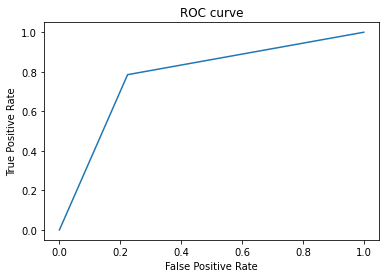

AUC value is 0.7806883587849753 


In [117]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

### 2. SVC:

In [128]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=76)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
SVC().fit(x_train_new,y_train_new)


param={'kernel' : ['linear', 'poly', 'rbf'],
       'C':[0.001,0.01,0.1,0.2,1],
       'gamma' : [0.01,0.1,0.2,0.3]}

In [119]:
Grid=GridSearchCV(SVC(),param,cv=9)
Grid.fit(x_train_new,y_train_new)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 1],
                         'gamma': [0.01, 0.1, 0.2, 0.3],
                         'kernel': ['linear', 'poly', 'rbf']})

In [120]:
Grid.best_params_

{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}

In [131]:
svc=SVC(C=1,kernel='linear',gamma=0.3)
svc.fit(x_train_new,y_train_new)
svc.predict(x_train)
pred=svc.predict(x_test)
scores=accuracy_score(y_test,pred)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", scores)
print("\n F1 Score for testing is : ", f1_score(y_test,pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
print("\n The Classification report for Testing \n", classification_report(y_test,pred))




***********************Testing Scores******************************

Accuracy score for testing is :  0.7767653758542141

 F1 Score for testing is :  0.6537102473498232
Confusion Matrix : 
 [[994 296]
 [ 96 370]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.91      0.77      0.84      1290
           1       0.56      0.79      0.65       466

    accuracy                           0.78      1756
   macro avg       0.73      0.78      0.74      1756
weighted avg       0.82      0.78      0.79      1756



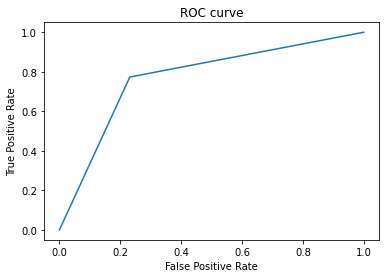

AUC value is 0.771058736181871 


In [127]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

### 3. Gradient Boosting Classifier:

In [132]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=21)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
GradientBoostingClassifier().fit(x_train_new,y_train_new)


param={'loss' : ['deviance', 'exponential'],
      'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']}

In [122]:
Grid=RandomizedSearchCV(GradientBoostingClassifier(),param,cv=8,n_jobs=-1)
Grid.fit(x_train_new,y_train_new)

RandomizedSearchCV(cv=8, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'loss': ['deviance', 'exponential']})

In [123]:
Grid.best_params_

{'loss': 'deviance', 'criterion': 'friedman_mse'}

In [135]:
gbdt=GradientBoostingClassifier(loss='deviance',criterion='friedman_mse')
gbdt.fit(x_train_new,y_train_new)
gbdt.predict(x_train)
pred_test=gbdt.predict(x_test)
score=accuracy_score(y_test,pred_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", scores)
print("\n F1 Score for testing is : ", f1_score(y_test,pred_test))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred_test))
print("\n The Classification report for Testing \n", classification_report(y_test,pred_test))




***********************Testing Scores******************************

Accuracy score for testing is :  0.7767653758542141

 F1 Score for testing is :  0.6271186440677965
Confusion Matrix : 
 [[1027  270]
 [ 126  333]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1297
           1       0.55      0.73      0.63       459

    accuracy                           0.77      1756
   macro avg       0.72      0.76      0.73      1756
weighted avg       0.80      0.77      0.78      1756



## ROC and AUC

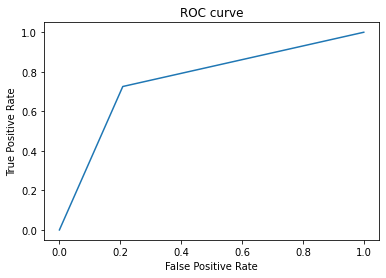

AUC value is 0.7586587449166251 


In [136]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,pred_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## `Logistic Regression` gives us the best accuracy. Let's Make it best fit model.

### Saving the Best Model:

In [137]:
import joblib
joblib.dump(lr,'Telecom_Customer_churn')

['Telecom_Customer_churn']

## Comparing:

In [138]:
original=np.array(y_test)
predicted=np.array(lr.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0
...,...,...
1751,0,0
1752,0,1
1753,0,1
1754,0,0
